In [23]:
from plyfile import PlyData, PlyElement

import numpy as np
import time

import matplotlib.pyplot as plt

In [2]:
ply = PlyData.read("2020-08-13_10 10 32.006_529_quick.ply")

In [3]:
ply["vertex"]

PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('red', 'uchar'), PlyProperty('green', 'uchar'), PlyProperty('blue', 'uchar')), count=231989, comments=[])

In [20]:
vertices = np.array([list(v)[:3] for v in ply["vertex"]])

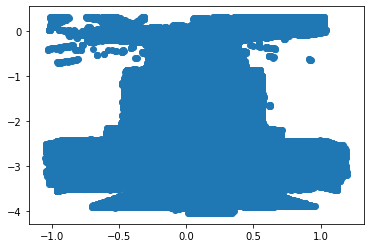

In [28]:
vertices = np.array([list(v)[:3] for v in ply["vertex"]])
plt.scatter(vertices[:,0],vertices[:,2]) ## x&z

In [86]:
ply["camera"]

PlyElement('camera', (PlyProperty('view_px', 'float'), PlyProperty('view_py', 'float'), PlyProperty('view_pz', 'float'), PlyProperty('x_axisx', 'float'), PlyProperty('x_axisy', 'float'), PlyProperty('x_axisz', 'float'), PlyProperty('y_axisx', 'float'), PlyProperty('y_axisy', 'float'), PlyProperty('y_axisz', 'float'), PlyProperty('z_axisx', 'float'), PlyProperty('z_axisy', 'float'), PlyProperty('z_axisz', 'float'), PlyProperty('focal', 'float'), PlyProperty('scalex', 'float'), PlyProperty('scaley', 'float'), PlyProperty('centerx', 'float'), PlyProperty('centery', 'float'), PlyProperty('viewportx', 'int'), PlyProperty('viewporty', 'int'), PlyProperty('k1', 'float'), PlyProperty('k2', 'float')), count=1, comments=[])

<generator object <genexpr> at 0x7f59f3891cd0>

In [14]:
for i, v in enumerate(ply["vertex"][0]):
    print(v)

1.180018
-0.102008365
-3.040773
15
1
0


In [15]:
from benedict import ClusterBatch

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
dbscan = DBSCAN(.03).fit_predict(cloud)
clst = dict(zip(*np.unique(dbscan, return_counts=True)))
main = max(clst.items(), key=lambda i:i[1])
total = sum(clst.values()) -main[1]
total

3268

In [23]:
ply["vertex"]

PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('red', 'uchar'), PlyProperty('green', 'uchar'), PlyProperty('blue', 'uchar')), count=231989, comments=[])

In [18]:
out_idxs = [i for i, label in enumerate(dbscan) if label != main[0]]

In [19]:
for idx in range(ply["vertex"].count):
    if idx in out_idxs:
        ply["vertex"][idx] = tuple(
            val if i > 2 else 0 for i, val in enumerate(ply["vertex"][idx])
        )

In [11]:
ply["vertex"][0] = tuple(val if i > 2 else 0 for i, val in enumerate(ply["vertex"][0]))

In [247]:
with open("test1.ply", "wb") as file:
    ply.write(file)

In [248]:
for idx in range(ply["vertex"].count):
    if idx < ply["vertex"].count//2:
        ply["vertex"][idx] = tuple(
            val if i > 2 else 0 for i, val in enumerate(ply["vertex"][idx])
        )

In [20]:
with open("2020-08-13_10 10 32.006_529_quick_prep.ply", "wb") as file:
    ply.write(file)

In [253]:
for idx in range(ply["vertex"].count):
    if idx % 2 == 0: 
        ply["vertex"][idx] = tuple(
            val if i > 2 else 0 for i, val in enumerate(ply["vertex"][idx])
        )

In [254]:
with open("test3.ply", "wb") as file:
    ply.write(file)

In [9]:
cloud = np.array(list(zip(
    ply["vertex"]["x"],
    ply["vertex"]["y"],
    ply["vertex"]["z"]
)))

In [ ]:
start = time.time()

ClusterBatch.calculate_cross_euclidean(cloud)

print((time.time()-start)//60)